In [34]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

import codecs
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

plt.rcParams.update({'font.size': 18})


In [26]:
tags = open('data/training_tags.txt').read().splitlines()
texts = codecs.open('data/training_texts.txt', 'r', 'utf-8').read().splitlines()
df = pd.DataFrame({'tag': tags, 'text': texts})

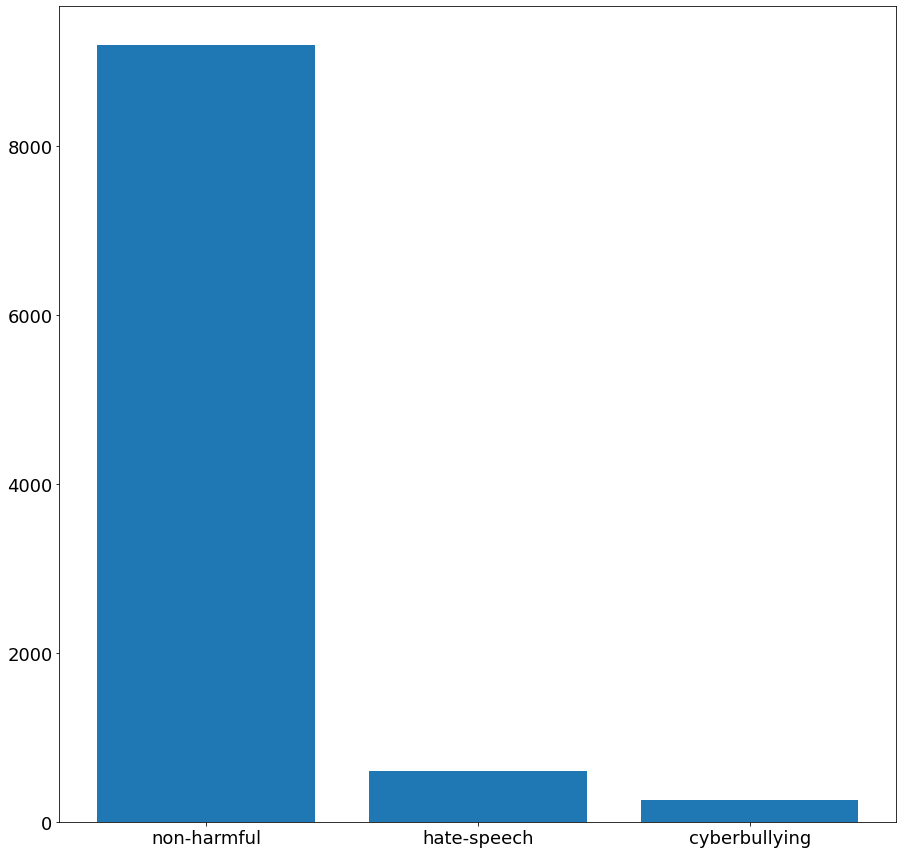

In [27]:
tag_counts = dict(Counter(tags))

tag_to_string = {
    '0': 'non-harmful',
    '1': 'cyberbullying',
    '2': 'hate-speech',
}

plt.figure(figsize=(15, 15))
labels = [tag_to_string[tag] for tag in tag_counts.keys()]
plt.bar(labels, list(tag_counts.values()))
plt.savefig('tags_bar_plot.png')

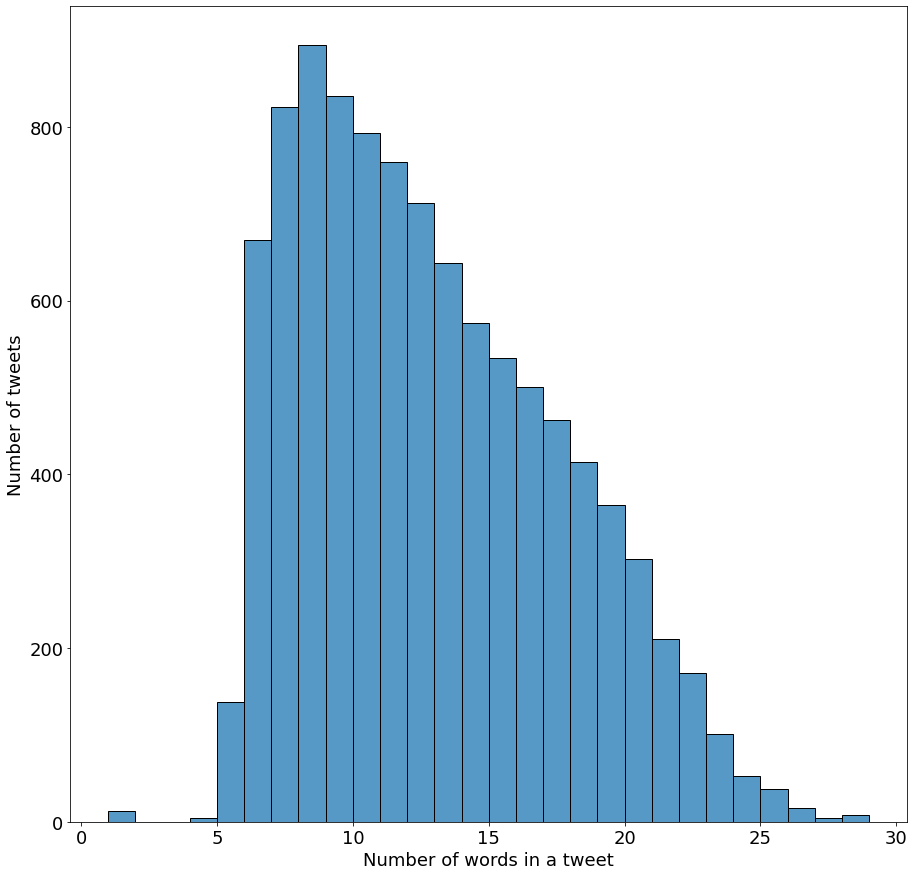

In [28]:
lengths = [len(text.split()) for text in list(df.text)]
plt.figure(figsize=(15, 15))
sns.histplot(lengths, binwidth=1)
plt.xlabel('Number of words in a tweet')
plt.ylabel('Number of tweets')
plt.savefig('tweet_word_counts_plot.png')

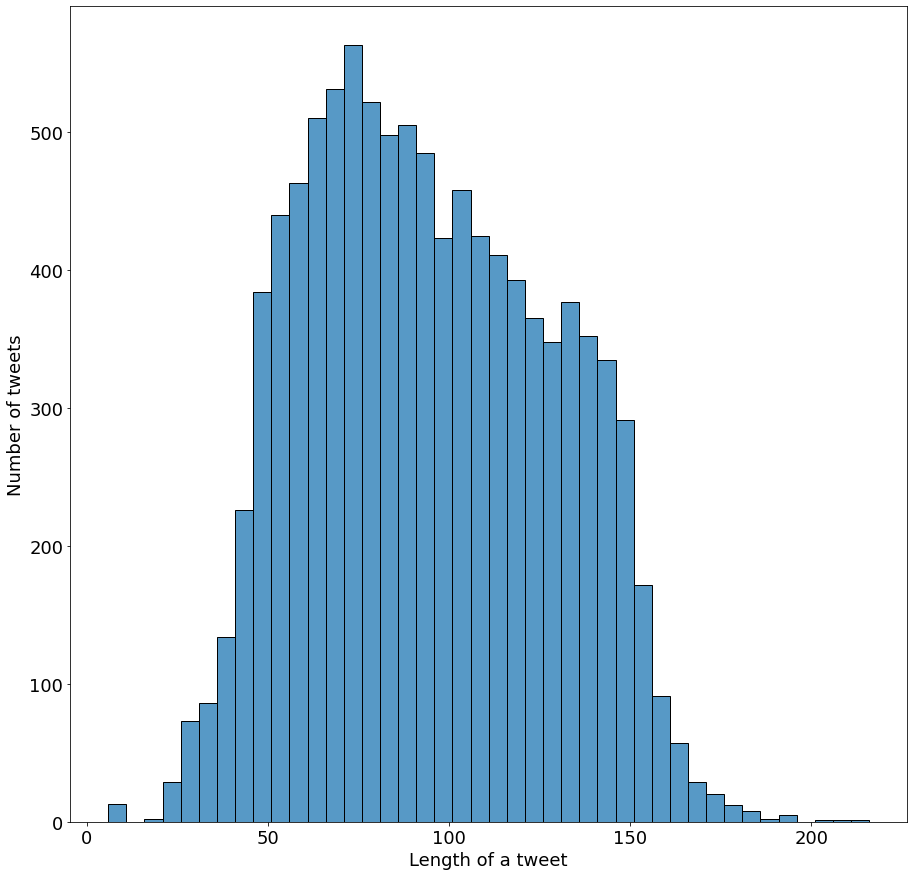

In [29]:
lengths = [len(text) for text in list(df.text)]
plt.figure(figsize=(15, 15))
sns.histplot(lengths, binwidth=5)
plt.xlabel('Length of a tweet')
plt.ylabel('Number of tweets')
plt.savefig('tweet_lengths_plot.png')


KeyError: 'Column not found: word_count'

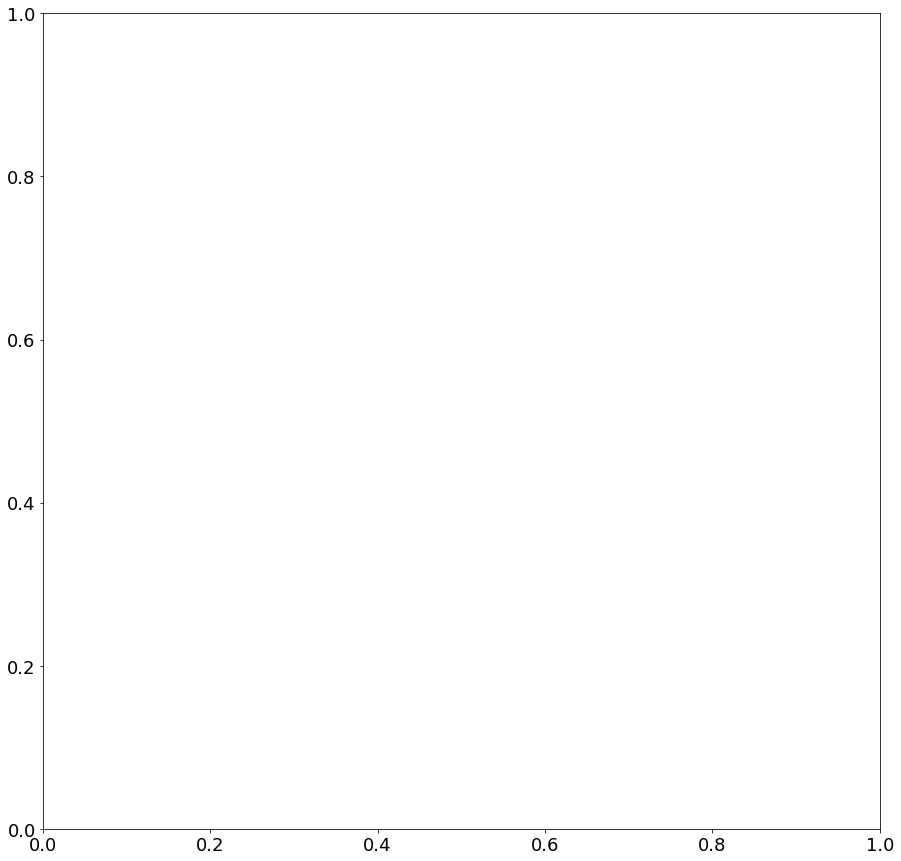

In [30]:
df['tag_string'] = [tag_to_string[tag] for tag in df['tag']]
df.boxplot(column=['word_count'], by='tag_string', figsize=(15, 15), grid=False)
plt.ylabel('Number of words in a tweet')
plt.title('')
plt.savefig('tweet_word_counts_box_plot.png')

In [42]:
stop_words = ['a', 'aby', 'ach', 'acz', 'aczkolwiek', 'aj', 'albo', 'ale', 'alez', 'ależ', 'ani', 'az', 'aż', 'bardziej', 'bardzo', 'beda', 'bedzie', 'bez', 'deda', 'będą', 'bede', 'będę', 'będzie', 'bo', 'bowiem', 'by', 'byc', 'być', 'byl', 'byla', 'byli', 'bylo', 'byly', 'był', 'była', 'było', 'były', 'bynajmniej', 'cala', 'cali', 'caly', 'cała', 'cały', 'ci', 'cie', 'ciebie', 'cię', 'co', 'cokolwiek', 'cos', 'coś', 'czasami', 'czasem', 'czemu', 'czy', 'czyli', 'daleko', 'dla', 'dlaczego', 'dlatego', 'do', 'dobrze', 'dokad', 'dokąd', 'dosc', 'dość', 'duzo', 'dużo', 'dwa', 'dwaj', 'dwie', 'dwoje', 'dzis', 'dzisiaj', 'dziś', 'gdy', 'gdyby', 'gdyz', 'gdyż', 'gdzie', 'gdziekolwiek', 'gdzies', 'gdzieś', 'go', 'i', 'ich', 'ile', 'im', 'inna', 'inne', 'inny', 'innych', 'iz', 'iż', 'ja', 'jak', 'jakas', 'jakaś', 'jakby', 'jaki', 'jakichs', 'jakichś', 'jakie', 'jakis', 'jakiś', 'jakiz', 'jakiż', 'jakkolwiek', 'jako', 'jakos', 'jakoś', 'ją', 'je', 'jeden', 'jedna', 'jednak', 'jednakze', 'jednakże', 'jedno', 'jego', 'jej', 'jemu', 'jesli', 'jest', 'jestem', 'jeszcze', 'jeśli', 'jezeli', 'jeżeli', 'juz', 'już', 'kazdy', 'każdy', 'kiedy', 'kilka', 'kims', 'kimś', 'kto', 'ktokolwiek', 'ktora', 'ktore', 'ktorego', 'ktorej', 'ktory', 'ktorych', 'ktorym', 'ktorzy', 'ktos', 'ktoś', 'która', 'które', 'którego', 'której', 'który', 'których', 'którym', 'którzy', 'ku', 'lat', 'lecz', 'lub', 'ma', 'mają', 'mało', 'mam', 'mi', 'miedzy', 'między', 'mimo', 'mna', 'mną', 'mnie', 'moga', 'mogą', 'moi', 'moim', 'moj', 'moja', 'moje', 'moze', 'mozliwe', 'mozna', 'może', 'możliwe', 'można', 'mój', 'mu', 'musi', 'my', 'na', 'nad', 'nam', 'nami', 'nas', 'nasi', 'nasz', 'nasza', 'nasze', 'naszego', 'naszych', 'natomiast', 'natychmiast', 'nawet', 'nia', 'nią', 'nic', 'nich', 'nie', 'niech', 'niego', 'niej', 'niemu', 'nigdy', 'nim', 'nimi', 'niz', 'niż', 'no', 'o', 'obok', 'od', 'około', 'on', 'ona', 'one', 'oni', 'ono', 'oraz', 'oto', 'owszem', 'pan', 'pana', 'pani', 'po', 'pod', 'podczas', 'pomimo', 'ponad', 'poniewaz', 'ponieważ', 'powinien', 'powinna', 'powinni', 'powinno', 'poza', 'prawie', 'przeciez', 'przecież', 'przed', 'przede', 'przedtem', 'przez', 'przy', 'roku', 'rowniez', 'również', 'sam', 'sama', 'są', 'sie', 'się', 'skad', 'skąd', 'soba', 'sobą', 'sobie', 'sposob', 'sposób', 'swoje', 'ta', 'tak', 'taka', 'taki', 'takie', 'takze', 'także', 'tam', 'te', 'tego', 'tej', 'ten', 'teraz', 'też', 'to', 'toba', 'tobą', 'tobie', 'totez', 'toteż', 'totobą', 'trzeba', 'tu', 'tutaj', 'twoi', 'twoim', 'twoj', 'twoja', 'twoje', 'twój', 'twym', 'ty', 'tych', 'tylko', 'tym', 'u', 'w', 'wam', 'wami', 'was', 'wasz', 'wasza', 'wasze', 'we', 'według', 'wiele', 'wielu', 'więc', 'więcej', 'wlasnie', 'właśnie', 'wszyscy', 'wszystkich', 'wszystkie', 'wszystkim', 'wszystko', 'wtedy', 'wy', 'z', 'za', 'zaden', 'zadna', 'zadne', 'zadnych', 'zapewne', 'zawsze', 'ze', 'zeby', 'zeznowu', 'zł', 'znow', 'znowu', 'znów', 'zostal', 'został', 'żaden', 'żadna', 'żadne', 'żadnych', 'że', 'żeby', '@anonymized_account', 'anonymized_account']



words = []
for text in texts:
    text = text.lower()
    text = text.replace(',', '')
    text = text.replace('.', '')
    for stop_word in stop_words:
        text = text.replace(' ' + stop_word + ' ', ' ')
    words.extend(text.split())

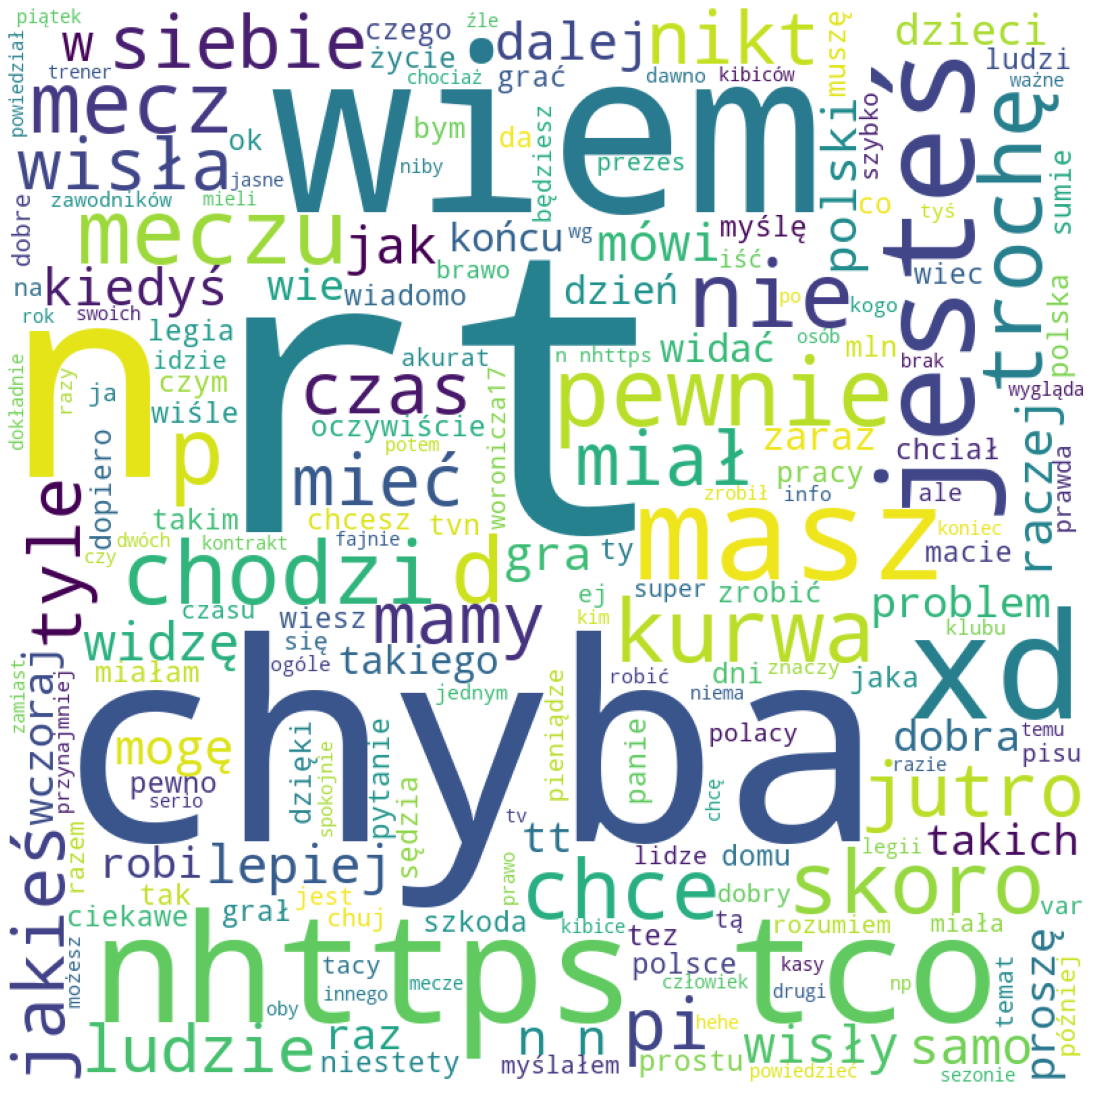

In [45]:
cloud = ' '.join(words)
cloud = cloud.replace('anonymized_account', '')
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(cloud)

# plot the WordCloud image
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('word_cloud.png')

plt.show()